In [0]:
import numpy as np
import math
import random
#!pip install shapely
from shapely.geometry import LineString,Point
import pandas as  pd
import copy
import time

length = 90
radius = 25
map_length = 1500
map_width = 1500

#We create an object called Obstacle
class Obstacle:
  def __init__(self, x1,y1, x2, y2):
    self.x1 = x1
    self.x2 = x2
    self.y1 = y1
    self.y2 = y2

#We create an object called State
class State:
    def __init__(self, x, y, angle):
        self.x = x
        self.y = y
        self.angle = ((angle * math.pi)/180)
        self.time = 0
        self.parent = None
    
    def print_state(self):
        print("X is: " + str(self.x))
        print("Y is: " + str(self.y))
        degrees = (self.angle * 180)/math.pi
        print("Angle is: " + str(degrees))
        print("Time: " + str(self.time))
        
#current_state = State(0, 0, )

#Solution to Q2A. Given set of points V, find which one is closest to point Xt
#We will use the Euclidean distance to measure the distance and then return the 
#smallest one.

#Given two points, this function returns the distance between them and 
#the slope of the line between them
def get_path(x1, x2):
    p1 = np.array((x1.x, x1.y))
    p2=  np.array((x2.x, x2.y))
    distance = np.linalg.norm(p1 - p2)
    slope = (p1[1] - p2[1])/(p1[0] - p2[0])
    return distance, slope

#SOlution for Q2B, Given initial point and the goal point, this functions
#generates the trajectory for the first second of travel
#The control inputs for this trajectory are the rotation needed
#to set the robot to the correct orientation and the moving in a straight
#line for the remaining time along the straight line connecting the two points.
#If the robot has reached the goal state and there is enough time available, 
#the robot will then attempt to change its orientation
#to the orientation prescribed by the goal state
def one_second_trajectory(xi, xt):
    dist_to_goal, slope = get_path(xi, xt)
    angle = math.atan(slope)
    #if angle < 0:
    #    angle = math.radians(180 + math.degrees(angle))
    #print("The angle of the goal point is: " + str(math.degrees(angle)))
    delta = (angle - xi.angle)% 2*math.pi
    #angle_multiplier = 1
    #if delta 
    #if delta > math.pi
    #print("Delta is: " + str(math.degrees(delta)))
    '''
    if delta_a < 0:
        #rotate clockwise, right negative, left positive
        omega_r = -60
        omega_l = 60
        time = (length * delta)/(8*math.pi)
        self.angle = angle
    elif delta_a > 0:
        #rotate counter clockwise, right positive, left negative
        omega = 
    else:
        pass
        #no rotation needed
    '''
    time_for_rotation = math.fabs((0.9 * delta)/(math.pi))
    
    if time_for_rotation > 1:
        angle_multiplier = 1
        if delta < 0:
            angle_multiplier = -1
        xi.angle += angle_multiplier * (8*math.pi)/length
        xi.time += 1
        return xi 
    #print("Time to rotate: " + str(time_for_rotation))
    xi.angle = angle
    #print("The new angle is: " + str(math.degrees(xi.angle)))
    #move in the right direction for the remaining time.
    #If there is still time after reaching the goal, change orientation to goal state
    #return this trajectory
    remaining_time = 1 - time_for_rotation
    if xt.y > xi.y:
        multiplier = 1
    elif xt.y < xi.y:
         multiplier = -1
    else:
        if xt.x > xi.x:
            multiplier = 1
        elif xt.x < xi.x:
            multiplier = -1
        #x_axis stuff
    distance = multiplier * (remaining_time * 2 * math.pi * radius)
    #Updating coordinates of the initial state based on angle to goal
    if math.fabs(distance) < dist_to_goal:
        xi.x += distance * math.cos(xi.angle)
        xi.y += distance * math.sin(xi.angle)
        xi.time += 1
    else:
        xi.x = xt.x
        xi.y = xt.y
        time_to_goal = dist_to_goal/(2*math.pi*radius)
        total_time_taken = time_for_rotation + time_to_goal
        xi.time += total_time_taken
    return xi



#This method check if given a path, whether the path is collision free. Answer to 2(c)
#It is a boolean method.
def is_collision_free(start_point, end_point, obstacles):
    path_string = LineString([Point(start_point.x,start_point.y), Point(end_point.x,end_point.y)])
    r = True
    for o in obstacles:
        l1 = LineString([Point(o.x1, o.y1), Point(o.x2, o.y1)])
        l2 = LineString([Point(o.x1, o.y1), Point(o.x1, o.y2)])
        l3 = LineString([Point(o.x2, o.y2), Point(o.x2, o.y1)])
        l4 = LineString([Point(o.x2, o.y2), Point(o.x1, o.y2)])
        lines = [l1,l2,l3,l4]
        for l in lines:
            if path_string.intersects(l):
                r = False
                break     
    return r
            






In [13]:
#Determines closest state, given a set of states

def closest_point(V, xt):
    dist = []
    for v in V:
      dist.append(np.sqrt((xt.x - v.x)**2 + (xt.y - v.y)**2))
    return V[dist.index(min(dist))]
#sample check of closest_point function
s1=State(0,0,0)
s2=State(100,100,0)
s3=State(1000,1000,0)
s4=State(200,200,0)
p=closest_point([s1,s2,s3],s4)
print(p.print_state())

X is: 100
Y is: 100
Angle is: 0.0
Time: 0
None


In [0]:
#Obtain trajectory optimally with no obstacles
def total_trajectory(init_state, final_state):
  angle_series =[math.degrees(init_state.angle)]
  time_series =[init_state.time]
  x_series =[init_state.x]
  y_series = [init_state.y]
  while not((init_state.x==final_state.x) and (init_state.y==final_state.y)):
    one_second_trajectory(init_state, final_state)
    init_state.print_state()
    x_series.append(init_state.x)
    y_series.append(init_state.y)
    time_series.append(init_state.time)
    angle_series.append(math.degrees(init_state.angle))
  df = pd.DataFrame(data= {'x': x_series,'y': y_series,'t':time_series,'theta':angle_series})
  return df


X is: 40
Y is: 40
Angle is: 106.0
Time: 1
X is: 22.429979718674417
Y is: 22.42997971867442
Angle is: 45.0
Time: 2
X is: 0
Y is: 0
Angle is: 45.00000000000001
Time: 2.201940767117956
          x         y         t  theta
0  40.00000  40.00000  0.000000   90.0
1  40.00000  40.00000  1.000000  106.0
2  22.42998  22.42998  2.000000   45.0
3   0.00000   0.00000  2.201941   45.0


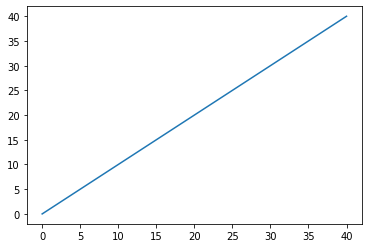

In [15]:
#Plotting Smooth Trajectory
init_state = State(40,40,90)
final_state = State(0,0,0)
df = total_trajectory(init_state, final_state)
import matplotlib.pyplot as plt
plt.plot(df.x,df.y)
print(df)

In [0]:
#Trajectory travelled in one second, we assume rotation occurs appropriately and just join two points
def simple_trajectory(xi, xt):
    angle = np.arctan2(xt.y - xi.y, xt.x - xi.x)
    dist_to_goal, slope = get_path(xi, xt)
    d = 2 * math.pi * radius
    xnew=State(xi.x,xi.y,0)
    if dist_to_goal <= d:
      xnew.x = xt.x
      xnew.y = xt.y
    else:
      delta_y = abs(d * math.sin(angle))
      delta_x = abs(d * math.cos(angle))
      if xt.y > xnew.y:
        xnew.y += delta_y
      else:
        xnew.y -= delta_y
      if xt.x > xnew.x:
        xnew.x += delta_x
      else:
        xnew.x -= delta_x
    return xnew

In [0]:
#Our MAIN rrt algorithm, answer to 2(d)
def rrt(xi,xg,obstacles,max_iter =2000):
  i=0
  statelist = [xi]
  while(i<max_iter):
    #pick random point:
    rand_x = np.random.uniform(0, map_length, 1)[0]
    rand_y = np.random.uniform(0, map_width, 1)[0]
    rand_pt = State(rand_x, rand_y, 0)
    #closest_state = closest_point(statelist, rand_pt)
    closest_state_copy = closest_point(statelist, rand_pt)
    new_state = simple_trajectory(closest_state_copy, rand_pt)
    if is_collision_free(closest_state_copy,new_state,obstacles):
      new_state.parent = closest_state_copy
     # new_state.parent.print_state()
     # new_state.print_state()
      statelist.append(new_state)
      dist_to_goal, slope = get_path(statelist[-1], xg)
      i += 1
      if dist_to_goal < 100:
        print("Distance lesser than 100!")
        break
      #time.sleep(0.5)
      if i % 100 == 0:
        print("Iteration number: " + str(i))
    else:
      continue
  return statelist


In [0]:
#Extracting the path from the tree, we start with the last node and we keep checking if parent is none untill we reach the starting node
def create_path2(statelist):
  # Find the path with all via points
    path = [statelist[-1]]
    last_node=statelist[-1]
    while (last_node.parent is not None):
      path.append(last_node.parent)
      last_node = last_node.parent
    path.append(statelist[0])
    print(len(path))
    return path
  
    

In [19]:
import time
#Setting initial and final state
xi = State(0, 400, 90)
xg = State(1400,900,0)
#total_trajectory(init_state, final_state)
#one_second_trajectory(init_state, final_state)
#init_state.print_state()

#Setting obstacles
obstacles = []
obstacle1 = Obstacle(800,1000,1500,1200)
obstacle2 = Obstacle(800,700,1500,900)
obstacle3 = Obstacle(300,100,700,1400)
#obstacle1 = Obstacle(400,600,1100,800)
#obstacle2 = Obstacle(800,0,900,100)
#obstacle3 = Obstacle(1200,0,1300,100)
#obstacle4 = Obstacle(300,0,400,300)

obstacles.append(obstacle1)
obstacles.append(obstacle2)
obstacles.append(obstacle3)
#obstacles.append(obstacle4)
#print(is_collision_free(init_state,final_state,obstacles))
start_time = time.time()
df = rrt(xi, xg,obstacles)
end_time = time.time()
print("Time for RRT: %s s" %str(end_time - start_time))
print(len(df))



Iteration number: 100
Iteration number: 200
Iteration number: 300
Iteration number: 400
Iteration number: 500
Distance lesser than 100!
Time for RRT: 1.7708196640014648 s
574


In [20]:
plath = create_path2(df)
print(plath)
print(plath[0].parent)

29
[<__main__.State object at 0x7fc65632c358>, <__main__.State object at 0x7fc65632c5c0>, <__main__.State object at 0x7fc65632c0f0>, <__main__.State object at 0x7fc6563230b8>, <__main__.State object at 0x7fc656321c50>, <__main__.State object at 0x7fc65631edd8>, <__main__.State object at 0x7fc65631eda0>, <__main__.State object at 0x7fc65631e668>, <__main__.State object at 0x7fc65631e588>, <__main__.State object at 0x7fc656360e48>, <__main__.State object at 0x7fc65635a4a8>, <__main__.State object at 0x7fc65641cb70>, <__main__.State object at 0x7fc65631b630>, <__main__.State object at 0x7fc65631b390>, <__main__.State object at 0x7fc65630c400>, <__main__.State object at 0x7fc65630c2e8>, <__main__.State object at 0x7fc65630c9b0>, <__main__.State object at 0x7fc65630cbe0>, <__main__.State object at 0x7fc65630c550>, <__main__.State object at 0x7fc6564935c0>, <__main__.State object at 0x7fc6564939b0>, <__main__.State object at 0x7fc6564932e8>, <__main__.State object at 0x7fc656301588>, <__main

574
29


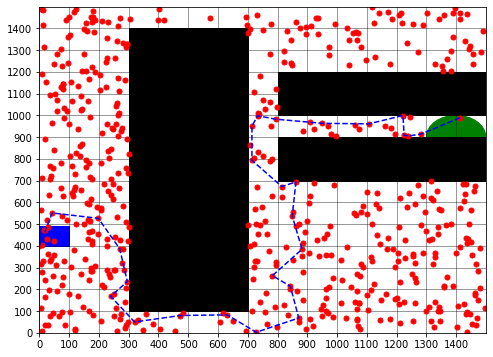

In [21]:

#Plotting the Operational space with the trajectory of the robot, and the graph


import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
plt.xlim((0,map_length))
plt.ylim((0,map_width))

# Major ticks every 100
major_ticks = np.arange(0, map_length, 100)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
ax.grid(which='both')
ax.grid(which='major', alpha=0.5)
plt.grid(True, color = 'k')

#Plot initial robot point (blue):
initial = plt.Rectangle((xi.x, xi.y), 100, 90, color='blue')
#plt.arrow(xi.x+10, xi.y+50, 50, 50, color='white', width=10)
ax.add_patch(initial)


#Plot Goal(green):
goal = plt.Circle((xg.x, xg.y), 100, color='g')
ax.add_patch(goal)


#Plot Obstacle (red):
for o in obstacles:
    o = plt.Rectangle((o.x1, o.y1),  o.x2-o.x1, o.y2-o.y1, color='black')
    ax.add_patch(o)


#plot the path:
x_series = []
y_series = []

for i in df:
  x_series.append(i.x)
  y_series.append(i.y) 
  #i.print_state()
print(len(df))
plt.plot( x_series, y_series, 'ro' , markersize = '5')

x_series = []
y_series = []

for i in plath:
  x_series.append(i.x)
  y_series.append(i.y) 
  #i.print_state()
print(len(plath))
plt.plot( x_series, y_series, 'b--' , markersize = '5')


In [0]:
#rrt star algorithm
def rrt_star(xi,xg,obstacles,max_iter =2000):
  i=0
  statelist = [xi]
  while(i<max_iter):
    #pick random point:
    rand_x = np.random.uniform(0, map_length, 1)[0]
    rand_y = np.random.uniform(0, map_width, 1)[0]
    rand_pt = State(rand_x, rand_y, 0)
    #closest_state = closest_point(statelist, rand_pt)
    closest_state_copy = closest_point(statelist, rand_pt)
    new_state = simple_trajectory(closest_state_copy, rand_pt)
    if is_collision_free(closest_state_copy,new_state,obstacles):
      closest_state_copy = closest_point(statelist, rand_pt)

      new_state.parent = closest_state_copy
     # new_state.parent.print_state()
     # new_state.print_state()
      statelist.append(new_state)
      dist_to_goal, slope = get_path(statelist[-1], xg)
      i += 1
      if dist_to_goal < 100:
        print("Distance lesser than 100!")
        break
      #time.sleep(0.5)
      if i % 100 == 0:
        print("Iteration number: " + str(i))
    else:
      continue
  return statelist